# Artificial Neural Networks

## Business Understanding

CRISP-DM

Handwritten digit recognition for U.S. Postal Service

### Initial Setups

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [ ]:
#%pip install tensorflow

In [2]:
#Read data from internet
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Data Understanding

In [4]:
#Take a look at the first observation in train dataset
print(X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
X_train[0].shape

(28, 28)

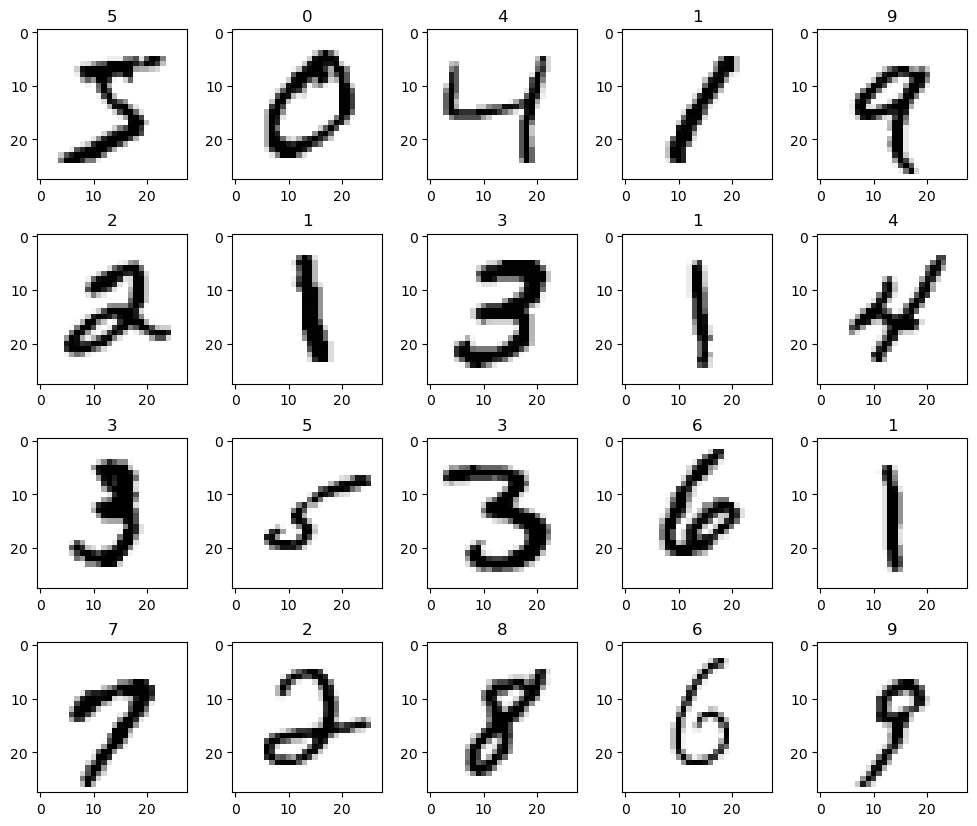

In [6]:
#Show the first 20 images from X_train
plt.figure(figsize = (12, 10))
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
for i in range(1, 21):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i - 1], cmap = plt.cm.binary)
    plt.title(y_train[i - 1])

## Data Preparation

In [7]:
#Convert 3-dimension array to 2-dimension array
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
#Min-max scaling for train and test
X_train = X_train / 255
X_test  = X_test / 255

#Check min and max of data points
print(X_train.max())
print(X_train.min())
print(X_test.max())
print(X_test.min())

1.0
0.0
1.0
0.0


In [9]:
#One-hot encoding for response variable
from tensorflow.keras.utils import to_categorical 
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [10]:
#Check one-hot encoding for the first observation in train dataset
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Build Predictive Model

In [11]:
#Define the model architecture
model = keras.Sequential()
#Hidden Layer 1
model.add(keras.layers.Dense(100, 
                             input_dim = 784 , 
                             activation = "relu")) 
#Output Layer
model.add(keras.layers.Dense(10, activation = "softmax"))  
model.summary() 

D:\anaconda\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Configure the model
model.compile(optimizer = 'Adam', 
              loss = 'categorical_crossentropy',
              #for regression: 'mean_squared_error'
              metrics = ['accuracy'])

In [13]:
#Train the model
model.fit(X_train, 
          y_train, 
          epochs = 20, 
          batch_size = 128, 
          validation_split = 0.3)

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7870 - loss: 0.7679 - val_accuracy: 0.9292 - val_loss: 0.2468
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9358 - loss: 0.2241 - val_accuracy: 0.9471 - val_loss: 0.1901
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9551 - loss: 0.1597 - val_accuracy: 0.9514 - val_loss: 0.1681
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9617 - loss: 0.1332 - val_accuracy: 0.9572 - val_loss: 0.1472
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9703 - loss: 0.1041 - val_accuracy: 0.9588 - val_loss: 0.1327
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9739 - loss: 0.0911 - val_accuracy: 0.9607 - val_loss: 0.1265
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9790 - loss: 0.0748 - val_accuracy: 0.9641 - val_loss: 0.1183
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9821 - loss: 0.0634 - val_accuracy: 0

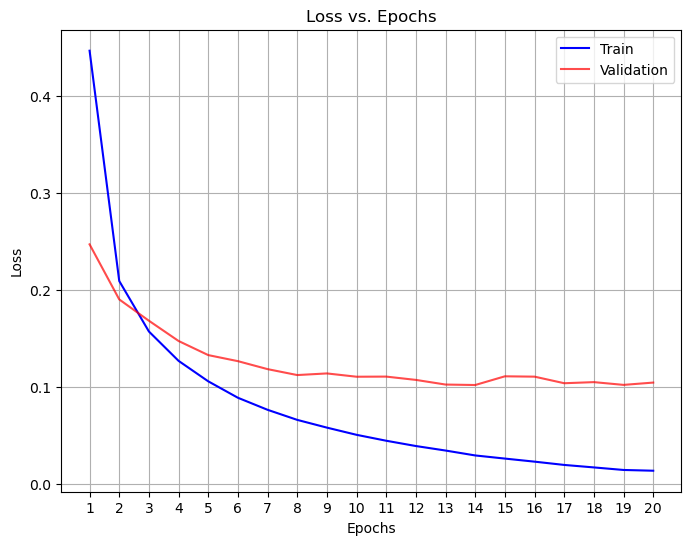

In [14]:
#Loss vs. Epochs
plt.figure(figsize = (8, 6))
plt.plot(model.history.history['loss'], 
         color = 'blue', 
         label = 'Train')
plt.plot(model.history.history['val_loss'], 
         color = 'red', 
         alpha = 0.7, label = 'Validation')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(ticks = range(20), labels = range(1, 21))
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

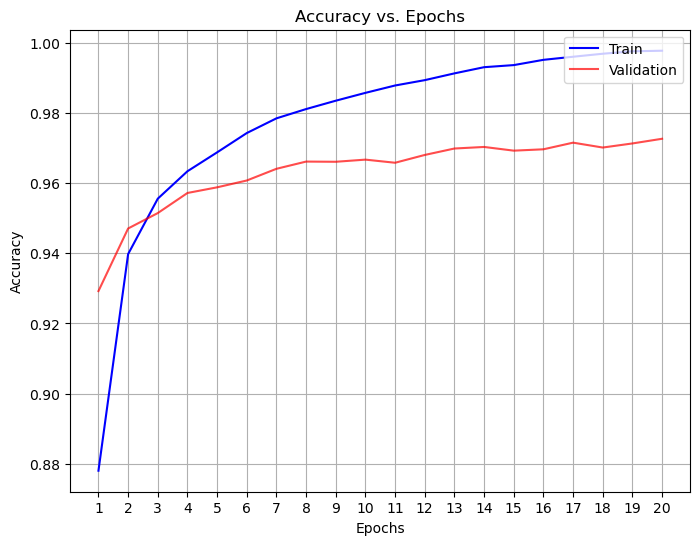

In [15]:
#Accuracy vs. Epochs
plt.figure(figsize = (8, 6))
plt.plot(model.history.history['accuracy'], 
         color = 'blue', 
         label = 'Train')
plt.plot(model.history.history['val_accuracy'], 
         color = 'red', 
         alpha = 0.7, label = 'Validation')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(ticks = range(20), labels = range(1, 21))
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [16]:
#Predict on test
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
#Check the results for the first observation in train dataset
print(y_pred[0])
print(np.argmax(y_pred[0]))
print(y_test[0])

[7.0803232e-08 7.3940631e-10 8.1423519e-07 5.5117480e-04 8.9289801e-13
 1.3518782e-07 5.8157450e-13 9.9942088e-01 2.8147105e-07 2.6729973e-05]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [18]:
#Test labels
test_labels = [np.argmax(y_test[i]) for i in range(len(y_test))]
test_pred = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

In [ ]:
#Prediction evaluation on train
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print('Accuracy is {r: 0.4f}'.format(r = accuracy_score(test_labels, 
                                                        test_pred)))
print('Precision is {r: 0.4f}'.format(r = precision_score(test_labels, 
                                                          test_pred,
                                                          average = 'micro')))
print('Recall is {r: 0.4f}'.format(r = recall_score(test_labels, 
                                                    test_pred,
                                                    average = 'micro')))
#If both false positive and false negatives are equally important, 
# use F1 score
print('F1 score is {r: 0.4f}'.format(r = f1_score(test_labels, 
                                                  test_pred,
                                                  average = 'micro')))
print('--- Confusion Matrix ---')
print(confusion_matrix(test_labels, test_pred))